In [1]:
import pandas as pd
import numpy as np

In [3]:
position = pd.read_csv('datasets/Position_Salaries.csv')
position.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [4]:
position.shape

(10, 3)

In [5]:
position.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [6]:
position.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

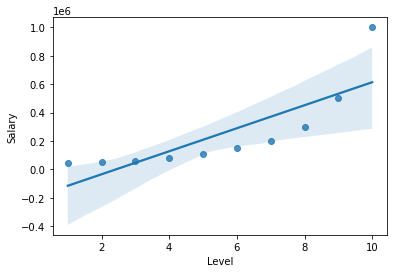

In [15]:
# Visulaize the data set
sns.regplot(x='Level', y='Salary', data=position)
plt.show()

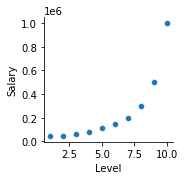

In [18]:
sns.pairplot(data=position, x_vars='Level', y_vars='Salary')

<AxesSubplot:>

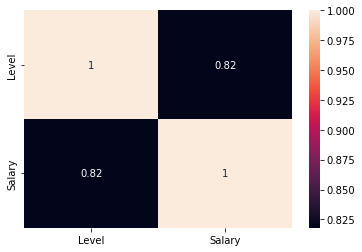

In [20]:
# Heat map
sns.heatmap(position.corr(), annot=True)

In [25]:
# Create x and y
X = position['Level']
y = position['Salary']

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
# Train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=100)

In [28]:
X_train.shape

(7,)

In [29]:
X_test.shape

(3,)

In [31]:
import statsmodels.api as sm

In [32]:
# Training the model 
X_train_sm = sm.add_constant(X_train)
X_train_sm.head()

C:\Users\amanb\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,Level
5,1.0,6
4,1.0,5
2,1.0,3
0,1.0,1
3,1.0,4


In [33]:
# Fitting the model
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()

In [34]:
lr_model.params

const   -244328.703704
Level     96192.129630
dtype: float64

In [35]:
lr_model.summary()

C:\Users\amanb\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     15.42
Date:                Fri, 18 Feb 2022   Prob (F-statistic):             0.0111
Time:                        13:14:32   Log-Likelihood:                -93.927
No. Observations:                   7   AIC:                             191.9
Df Residuals:                       5   BIC:                             191.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.443e+05   1.52e+05     -1.612      0.168   -6.34e+05    1.45e+05
Level       9.619e+04   2.45e+04      3.927      0.011    3.32e+04    1.59e+05
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.159
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.839
Skew:                           0.650   Prob(JB):                        0.657
Kurtosis:                       1.911   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

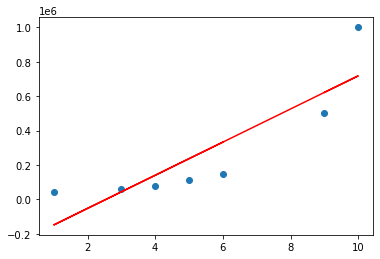

In [37]:
# Plotting the graphs
plt.scatter(X_train, y_train)
plt.plot(X_train, (-2.443e+05)+(9.619e+04	)*X_train, 'r')

In [38]:
y_train_pred = lr_model.predict(X_train_sm)
y_train_pred

5    332824.074074
4    236631.944444
2     44247.685185
0   -148136.574074
3    140439.814815
9    717592.592593
8    621400.462963
dtype: float64

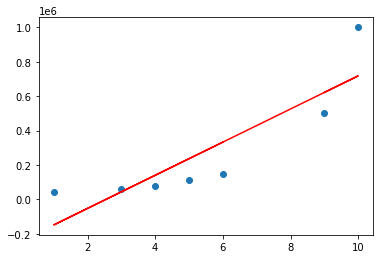

In [39]:
plt.scatter(X_train, y_train)
plt.plot(X_train, y_train_pred, 'r')

In [40]:
res = y_train - y_train_pred

<Figure size 432x288 with 0 Axes>

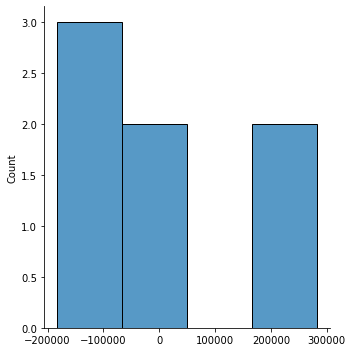

In [41]:
# Plot the residual
plt.figure()
sns.displot(res)

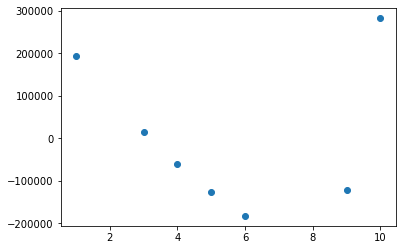

In [42]:
plt.scatter(X_train, res)
plt.show()

In [43]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = lr_model.predict(X_test_sm)
y_test_pred

C:\Users\amanb\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


7    525208.333333
6    429016.203704
1    -51944.444444
dtype: float64

In [44]:
from sklearn.metrics import r2_score

In [45]:
r2 = r2_score(y_true=y_test, y_pred=y_test_pred)
r2

-2.5861016225701143

In [49]:
# Mean square error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_test_pred)

37853294904.90676

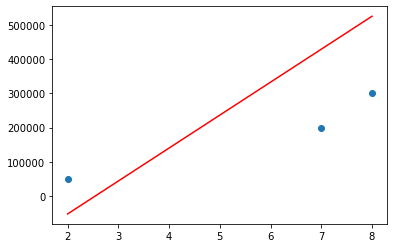

In [50]:
# Visulaize the predicition on the test set
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()